# OLS fitting example
In this notebook we will fit an Ordinary Least Squares model to some dummy data.

This model will find coefficients ($a$) for our hypothesised equation which minimise, $\epsilon$, the least squares error between the model and the data:
$$Data = a_1MT_1 + a_2MT_2 + a_3MT_3 ..... + \epsilon $$

For an ordinary least square model we assume that this error term is normally distributed with a mean of 0, we will check this assumption later on.

---
First lets generate some dummy data using a full factorial design with 2 levels for each factor. If we have 5 factors this means we are going to need to run $32\ (2^5)$ repeats.

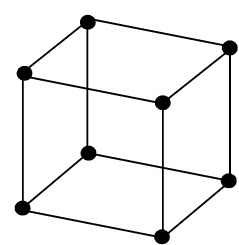

In [19]:
# These are python packages we will use to make life easier
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics as smg
import numpy as np
import pandas as pd
import pyDOE2 as doe
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

def fill_in_design(design):
    data = pd.DataFrame()
    data['temperature'] = design[:,0]*5+20
    data['force'] = design[:,1]*90+10
    data['humidity'] = design[:,2]
    data['lubricant'] = design[:,3] + 1
    data['hardness'] = design[:,4]*20+5
    data['friction'] = 10.5*(0.5*data['force'] + 
                        -0.5*data['temperature'] + 
                        20*(data['humidity']**2 - data['humidity']) +
                        -0.1 * np.log(data['lubricant']*1000)) + 10*np.random.randn(len(design))
    data_range = max(data['friction'])-min(data['friction'])
    
    data['friction'] = 0.2 + (data['friction']-min(data['friction']))/data_range
    return data

# The experimental design

In [2]:
design = doe.fullfact([2]*5)
print(design, '\n', len(design))

[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0.]
 [1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0.]
 [1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1.]
 [1. 1. 1. 0. 1.]
 [0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1.]
 [0. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1.]
 [0. 0. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 
 32


# The results table
We will use this design to fill in some dummy data for the results

In [3]:
data = fill_in_design(design)
display(data)

,temperature,force,humidity,lubricant,hardness,friction
0,20.0,10.0,0.0,1.0,5.0,0.293092
1,25.0,10.0,0.0,1.0,5.0,0.213712
2,20.0,100.0,0.0,1.0,5.0,1.192783
3,25.0,100.0,0.0,1.0,5.0,1.121065
4,20.0,10.0,1.0,1.0,5.0,0.277675
5,25.0,10.0,1.0,1.0,5.0,0.242083
6,20.0,100.0,1.0,1.0,5.0,1.163973
7,25.0,100.0,1.0,1.0,5.0,1.140338
8,20.0,10.0,0.0,2.0,5.0,0.316854
9,25.0,10.0,0.0,2.0,5.0,0.273495


# Plotting the results
The first thing to do is plot the result, this will immediately show you if there are any crazy things going on, don't just blindly trust the data!

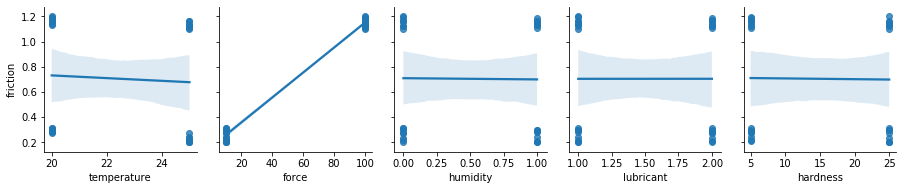

In [4]:
sns.pairplot(data, y_vars="friction", x_vars=data.columns.values[:-1], kind='reg')


# Modelling the data

In [5]:
model = smf.ols(formula='friction ~ force + temperature + humidity + lubricant + hardness', 
                data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               friction   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2172.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.31e-33
Time:                        15:32:08   Log-Likelihood:                 76.975
No. Observations:                  32   AIC:                            -142.0
Df Residuals:                      26   BIC:                            -133.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4161      0.042      9.931      

Text(0, 0.5, 'Fitted values')

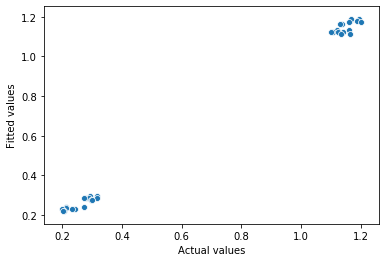

In [6]:
preds = results.predict(data)
ax = sns.scatterplot(data['friction'], preds)
ax.set_xlabel('Actual values')
ax.set_ylabel('Fitted values')

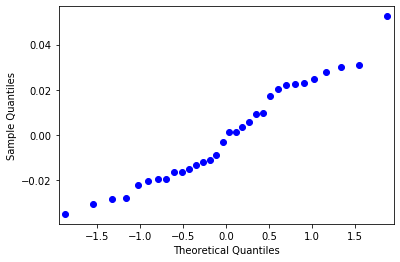

In [7]:
ax = smg.gofplots.qqplot(results.resid)

# Drawbacks
- Little can be learnt about the system despite doing a lot of experiments
- Many experiments are wasted if they cover factors that are not important
- Every factor added at least doubles the number of experiments!
- For a 2 level factor a linear model will always fit, no matter what the undelying function is

# Trying again with a latin hyper cube design


In [8]:
doe.lhs(5, 32)

array([[0.14462971, 0.95096485, 0.81849055, 0.52277907, 0.12959612],
       [0.98064815, 0.01829924, 0.51691616, 0.27216787, 0.5513859 ],
       [0.36211382, 0.18536683, 0.23513431, 0.65784009, 0.23170269],
       [0.91161703, 0.67069883, 0.53592507, 0.8116741 , 0.19413706],
       [0.48531111, 0.03805181, 0.97900152, 0.36354253, 0.86621449],
       [0.44727583, 0.83682072, 0.93460745, 0.15137491, 0.3929147 ],
       [0.19755092, 0.52934987, 0.17153775, 0.44572896, 0.73453485],
       [0.71405305, 0.57242836, 0.35103462, 0.22338073, 0.47378017],
       [0.84241822, 0.20578454, 0.84944746, 0.10426519, 0.90740543],
       [0.66058139, 0.62932201, 0.01597194, 0.06327414, 0.69216335],
       [0.7277348 , 0.59783933, 0.33887081, 0.92899171, 0.95369771],
       [0.87318994, 0.41756065, 0.75603738, 0.82815602, 0.46003671],
       [0.607016  , 0.23748268, 0.66768896, 0.15774136, 0.34107516],
       [0.64551646, 0.93303127, 0.47470405, 0.02916251, 0.1172863 ],
       [0.77976193, 0.30600242, 0.

# The results table
We will use this design to fill in some dummy data for the results

In [9]:
data = fill_in_design(doe.lhs(5, 32))
display(data)

,temperature,force,humidity,lubricant,hardness,friction
0,21.589983,73.071783,0.567662,1.004799,23.374479,0.896314
1,20.127878,91.726299,0.106745,1.798074,17.509510,1.181647
2,24.853525,52.716352,0.994508,1.847294,8.840179,0.717528
3,22.910823,12.020665,0.827555,1.158304,8.223924,0.222290
4,20.723793,18.678646,0.739641,1.432428,23.761653,0.293273
5,24.196657,23.779932,0.698639,1.815191,21.993212,0.311773
6,22.345464,99.647575,0.802206,1.768049,19.538013,1.175108
7,22.028689,84.836968,0.437375,1.748973,16.330891,0.979739
8,22.145545,41.296521,0.550452,1.630114,18.379420,0.512718
9,24.606727,70.766403,0.940708,1.274852,15.458304,0.903628


# Plotting the results
The first thing to do is plot the result, this will immediately show you if there are any crazy things going on, don't just blindly trust the data!

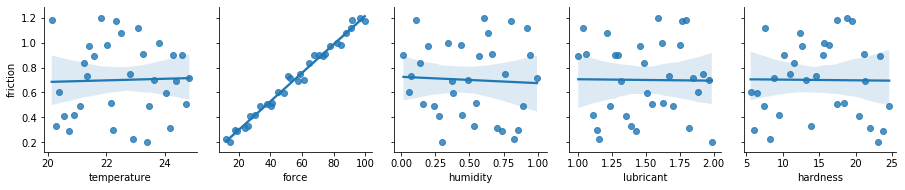

In [10]:
sns.pairplot(data, y_vars="friction", x_vars=data.columns.values[:-1], kind='reg')

# Modelling the data

In [22]:
model = smf.ols(formula='friction ~ force + temperature + humidity + lubricant + hardness', 
                data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               friction   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     427.1
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           4.39e-24
Time:                        15:34:00   Log-Likelihood:                 63.799
No. Observations:                  32   AIC:                            -115.6
Df Residuals:                      26   BIC:                            -106.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2478      0.110      2.253      

Text(0, 0.5, 'Fitted values')

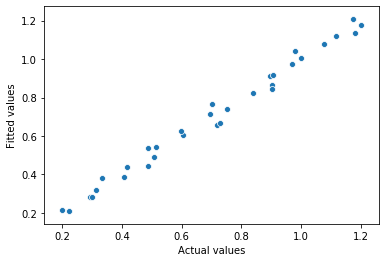

In [23]:
preds = results.predict(data)
ax = sns.scatterplot(data['friction'], preds)
ax.set_xlabel('Actual values')
ax.set_ylabel('Fitted values')

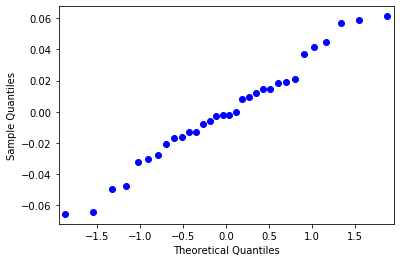

In [24]:
ax = smg.gofplots.qqplot(results.resid)

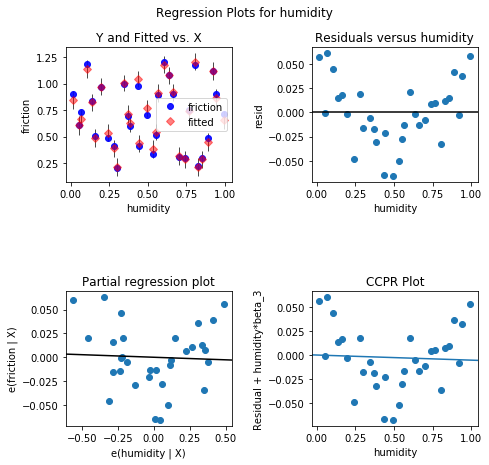

In [25]:
ax = smg.regressionplots.plot_regress_exog(results, 'humidity')
plt.gcf().set_size_inches(7, 7)

In [15]:
model = smf.ols(formula='friction ~ force + temperature + np.power(humidity,2) + humidity + lubricant + hardness', 
                data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               friction   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1020.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.28e-28
Time:                        15:32:11   Log-Likelihood:                 81.139
No. Observations:                  32   AIC:                            -148.3
Df Residuals:                      25   BIC:                            -138.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.33

Text(0, 0.5, 'Fitted values')

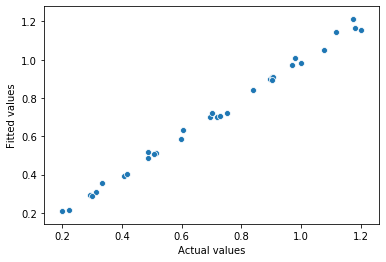

In [16]:
preds = results.predict(data)
ax = sns.scatterplot(data['friction'], preds)
ax.set_xlabel('Actual values')
ax.set_ylabel('Fitted values')

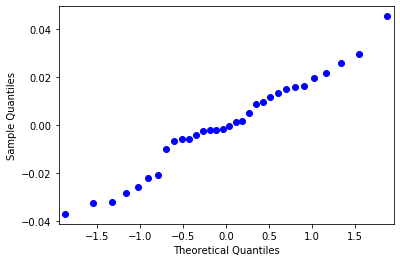

In [17]:
ax = smg.gofplots.qqplot(results.resid)

# Advantages / disadvantages
Pros
- More information can be gained from an unknown system
- Non linear behavious can be investigated more easily
- Adding factors doesn't necessarily make the experiment bigger\*

Cons
- Results must be analysed statistically
- Results can be difficult to interpret
- Lots of chance to fool yourself with fitting
- Effective number of comparisons can be huge, bad for hypothesis testing!